## First Part__TFIM
#### The Effect of Various External Bz on its Magnetic Properties

In this simulation, we suppose that there are a series of N spin particles in circular permutation to be our basic model. With this assumption, the Hamiltonian of the system can be calculated so that we can see the expected values of several physical properties by obtaining and analyzing its eigenvalues.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import *
import scipy.sparse as sparse

First, we create $S_x$, $S_y$, $S_z$ as Pauli matrices multiplied with $\frac{1}{2}$, and define the Hamiltonians $H_x$, $H_{xx}$, $H_z$ as functions of $N$, the number of the spin particles, below.
$$ H_x(N) := \sum_{i}^{N} S_{x, i} $$
$$ H_{xx}(N) := \sum_{i, i+1}^{N} S_{x, i} S_{x, i+1} $$
$$ H_z(N) := \sum_{i}^{N} S_{z, i} $$
And according to the definition of Heisenberg spin Hamiltonian:

$$H = -hH_z-JH_{xx}$$

where $h$ represents the external magnetic field in z-direction, and $J$ is a ratio constant.

We'll later find out the eigenvalues and eigenvectors of Heisenberg spin Hamiltonian to illustrate the physical picture of this spin system.

In [4]:
Sx = np.array([[0,0.5],[0.5,0]])
Sy = np.array([[0,-0.5j],[0.5j,0]])
Sz = np.array([[0.5,0],[0,-0.5]])
I = np.array([[1,0],[0,1]])
sparse.csr_matrix(Sx)
sparse.csr_matrix(Sy)
sparse.csr_matrix(Sz)
sparse.csr_matrix(I)

# Useful algorithm: rotation
def Hx(N):
    M = [Sx]+ [I]*(N-1) + [Sx]+ [I]*(N-1)  #append: For example, [Sx, I, I, I] + [Sx, I, I, I] = [Sx, I, I, I, Sx, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hxx(N):
    M = [Sx]*2+ [I]*(N-2) + [Sx]*2+ [I]*(N-2)  #append: For example, [Sx, Sx, I, I] + [Sx, Sx, I, I] = [Sx, Sx, I, I, Sx, Sx, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hz(N):
    M = [Sz]+ [I]*(N-1) + [Sz]+ [I]*(N-1)  #append: For example, [Sz, I, I, I] + [Sz, I, I, I] = [Sz, I, I, I, Sz, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

Then, the Hamiltonians for $N$ = 4, 6, 8, 10, 12, 14, 16 are calculated below, and 6 figures are plotted:

#### Figure.1: the relation betweeen $E/N$ and $h$

#### Figure.2: the relation betweeen $\frac{d^2}{dh^2}(-E/N)$ and $h$

#### Figure.3: the relation betweeen $E_1-E_0$ (energy gap) and $h$

#### Figure.4: the relation betweeen $\langle m_z \rangle$ and $h$

#### Figure.5: the relation betweeen $| \langle E_0|H_X|E_1 \rangle |$ and $h$

#### Figure.6: the relation betweeen $1/(E_1-E_0)N$ and $h$

where $E_0(=E)$ is defined as the first eigenvalue of $H$, and $E_1$ is defined as the second eigenvalue of $H$.

The energy gap is then defined as $E_1-E_0$.

$\langle m_z \rangle$ is the expected value of magnetic moment in z-direction.

The meaning of $1/(E_1-E_0)N$ is $\frac{\xi}{N}$, where $\xi$ is defined as $1/(E_1-E_0)$, called "coherence length".

4
6
8
10
12
14


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide


16


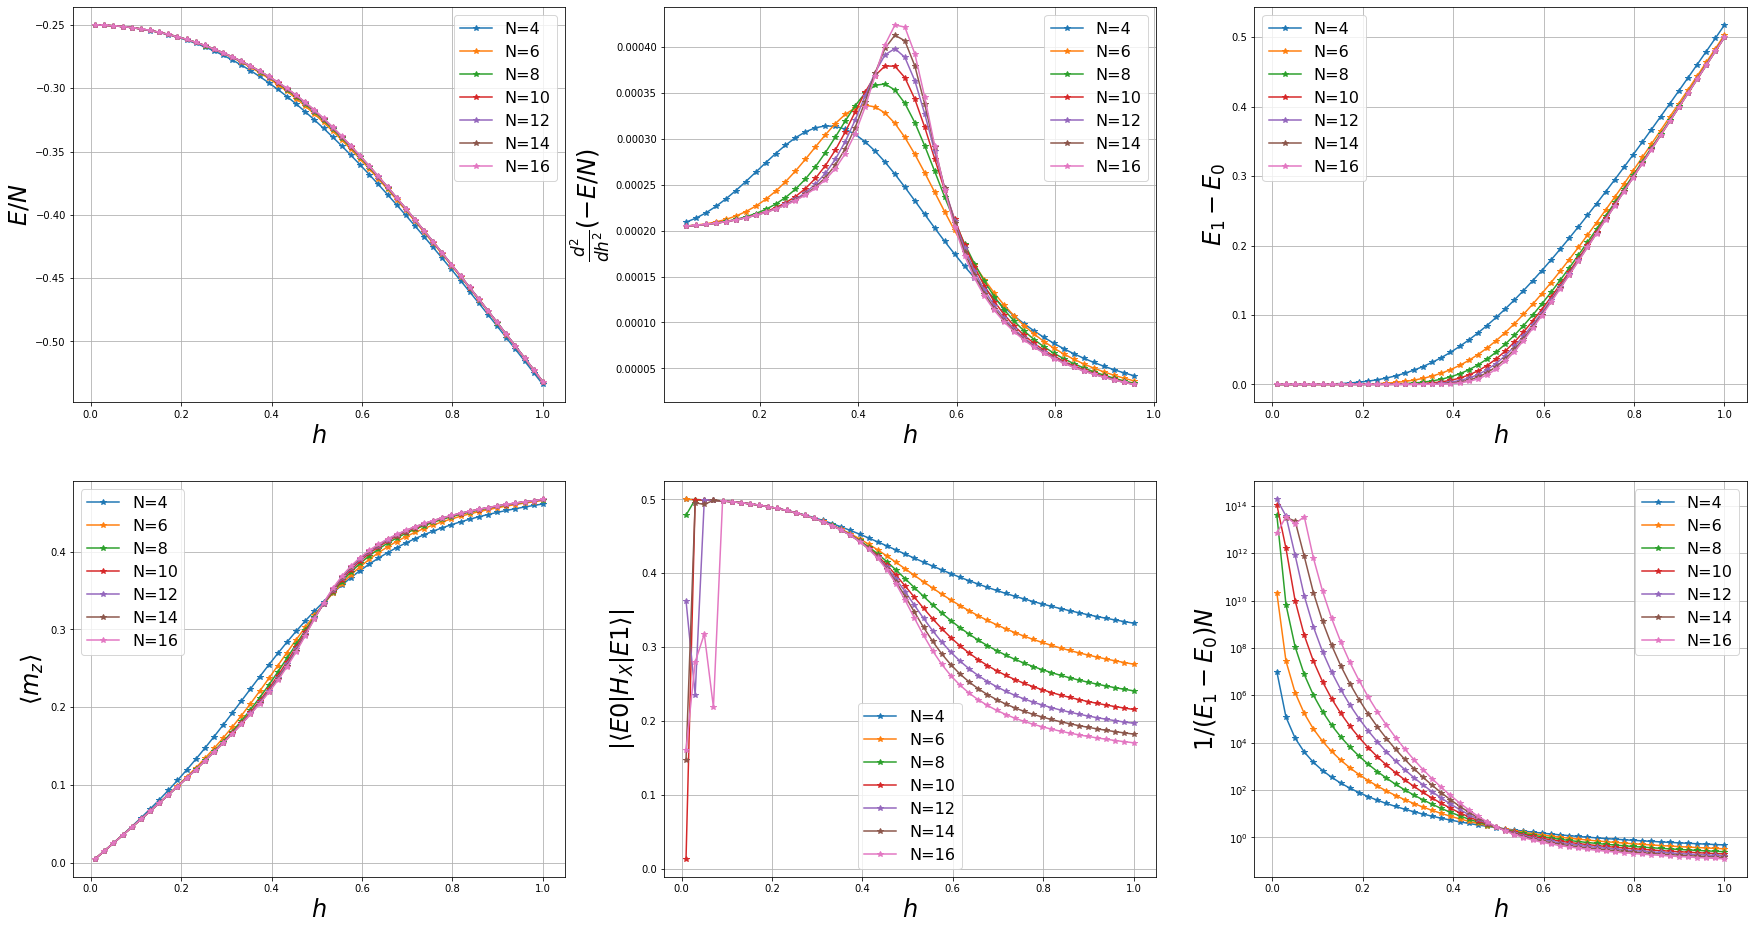

In [5]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10*3,8*2))
ax = ax.flatten()
J = 1

for N in [4, 6, 8, 10, 12, 14, 16]:
    print(N)
    h = np.linspace(0.01,1)
    E0 = np.zeros_like(h)
    E1 = np.zeros_like(h)      
    mx = np.zeros_like(h)
    mz = np.zeros_like(h)
    sparse.csr_matrix(E0)
    sparse.csr_matrix(E1)
    sparse.csr_matrix(mx)
    sparse.csr_matrix(mz)

    for i in range(h.shape[0]):
        H = -J*Hxx(N)-h[i]*Hz(N)
        w, v = eigsh(H, 2, which='SA')
        E0[i] = w[0]
        E1[i] = w[1]
        mx[i] = v[:,1]@Hx(N)@v[:,0]/N
        mz[i] = v[:,0]@Hz(N)@v[:,0]/N

    # E
    ax[0].plot(h, E0/N, '*-',label='N={}'.format(N))
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel(r'$h$',fontsize=24)
    ax[0].set_ylabel(r'$E/N$',fontsize=24)
    ax[0].grid()
    
    # d^2E/Eh^2
    ax[1].plot(h[2:-2], np.gradient(np.gradient(-E0/N))[2:-2], '*-', label='N={}'.format(N))
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel(r'$h$',fontsize=24)
    ax[1].set_ylabel(r'$\frac{d^2}{dh^2}(-E/N)$',fontsize=24)
    ax[1].grid()    
    
    # gap
    ax[2].plot(h, E1-E0, '*-',label='N={}'.format(N))
    ax[2].legend(fontsize=16)
    ax[2].set_xlabel(r'$h$',fontsize=24)
    ax[2].set_ylabel(r'$E_1-E_0$',fontsize=24)
    ax[2].grid()

    # mz
    ax[3].plot(h, mz, '*-',label='N={}'.format(N))
    ax[3].legend(fontsize=16)
    ax[3].set_xlabel(r'$h$',fontsize=24)
    ax[3].set_ylabel(r'$\langle m_z \rangle$',fontsize=24)
    ax[3].grid()   
    
    # mx
    ax[4].plot(h, np.abs(mx), '*-',label='N={}'.format(N))
    ax[4].legend(fontsize=16)
    ax[4].set_xlabel(r'$h$',fontsize=24)
    ax[4].set_ylabel(r'$| \langle E0|H_X|E1 \rangle |$',fontsize=24)
    ax[4].grid() 
    
    # xi/L
    ax[5].plot(h, 1/((E1-E0)*N), '*-', label='N={}'.format(N))
    ax[5].legend(fontsize=16)
    ax[5].set_xlabel(r'$h$',fontsize=24)
    ax[5].set_ylabel(r'$1/(E_1-E_0)N$',fontsize=24)
    ax[5].semilogy()
    ax[5].grid()   

Now, let's take a close look at the 6th figure, the relation betweeen $1/(E_1-E_0)N$ and $h$. We can notice that the intersections of functions of N and N+2 are not at the same point.